In [1]:
#Importing Necessary librearies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
sns.set()

In [2]:
#importing the csv file in to python
data = pd.read_csv(r"D:\IT\Data Science\Python\Affitech Technologies\Combined Data Sets For practice\Indian Liver Patient Dataset (ILPD).csv")
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
data.shape

(583, 11)

In [5]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

<AxesSubplot:>

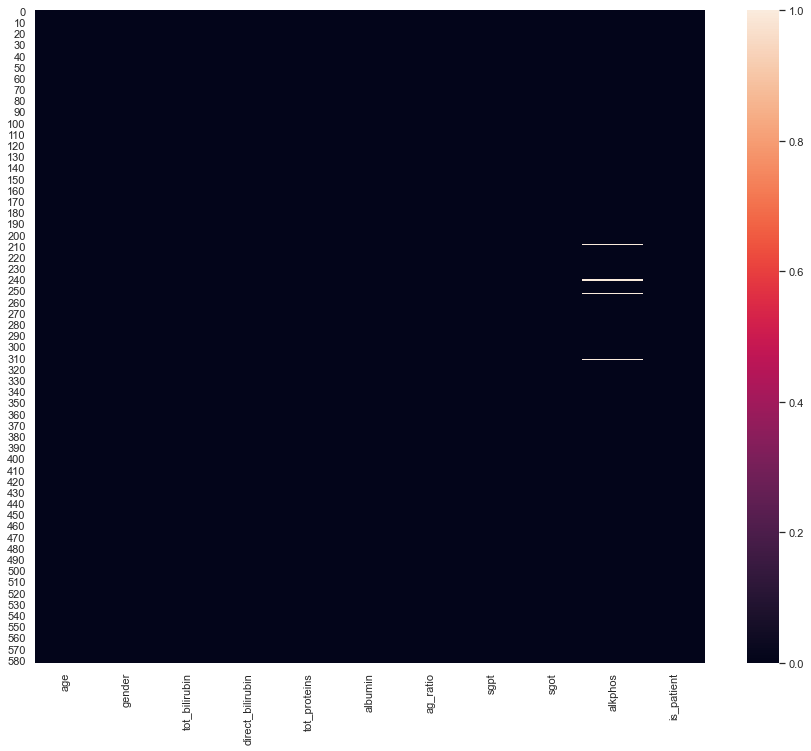

In [7]:
#Checking Nulll Value in the data
plt.figure(figsize = (15,12))
sns.heatmap(data.isnull())

In [8]:
data['alkphos'] = data['alkphos'].fillna(data['alkphos'].mean())

In [9]:
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [10]:
le = LabelEncoder()

In [11]:
data['gender'] = le.fit_transform(data['gender'])
data['gender']

0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: gender, Length: 583, dtype: int32

In [12]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

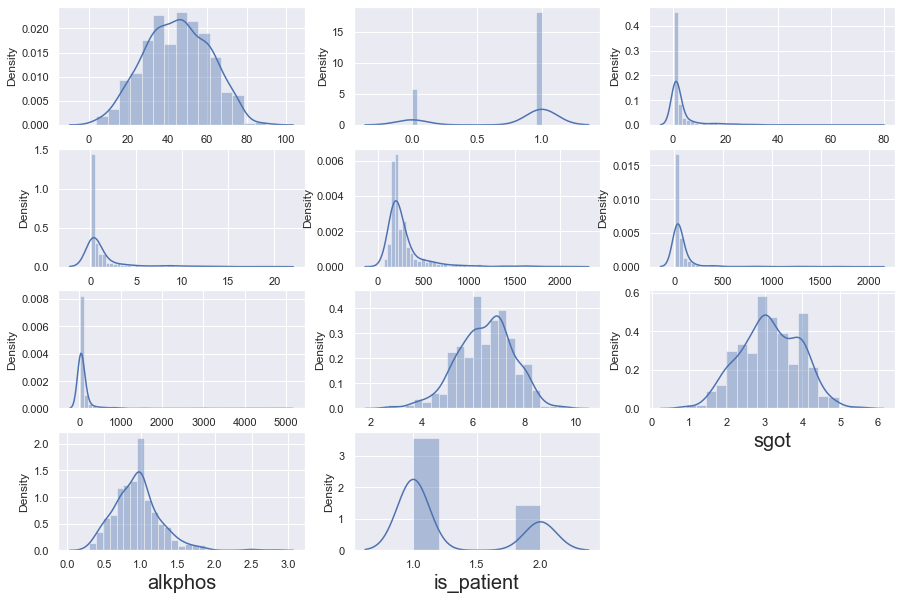

In [13]:
plt.figure(figsize = (15,10), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

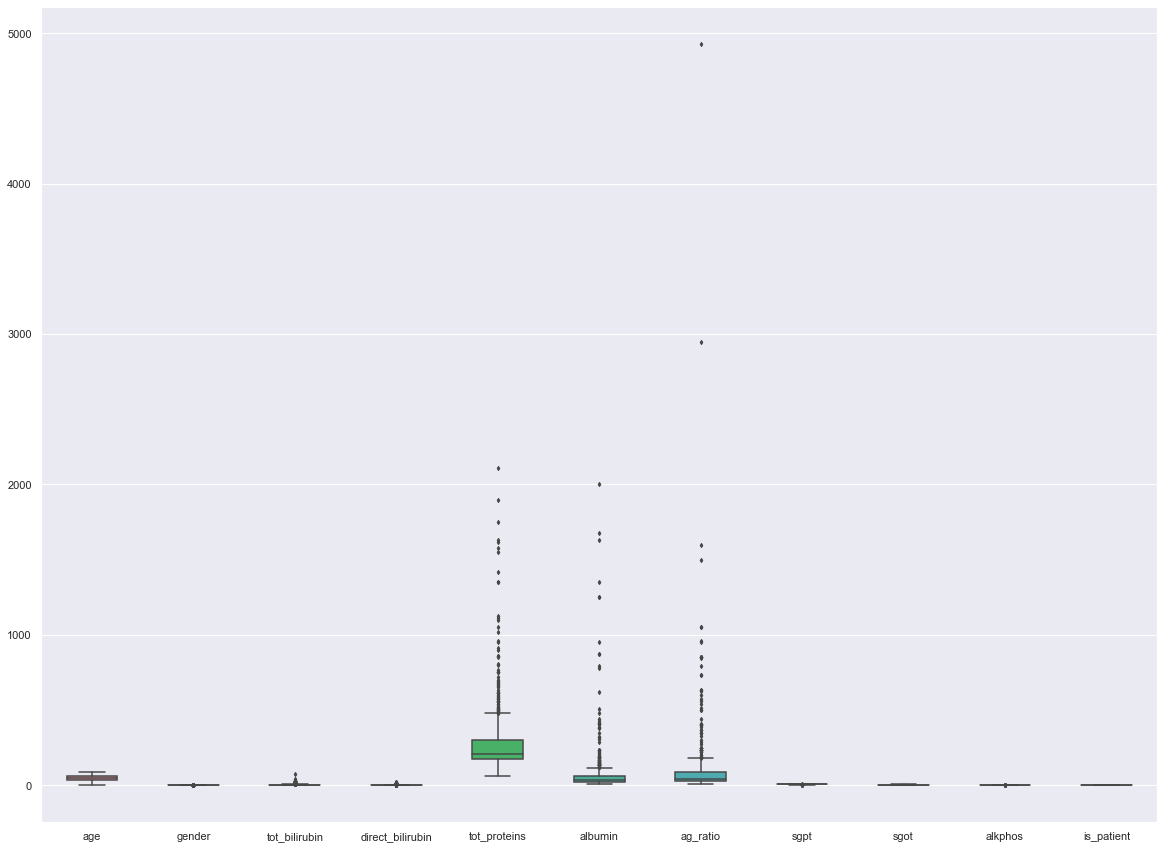

In [14]:
fig,ax = plt.subplots(figsize = (20,15))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)

In [15]:
q = data['tot_proteins'].quantile(0.85)
data_cleaned = data[data['tot_proteins']<q]

q = data['albumin'].quantile(0.85)
data_cleaned = data[data['albumin']<q]

q = data['ag_ratio'].quantile(0.85)
data_cleaned = data[data['ag_ratio']<q]

#q = data['tot_bilirubin'].quantile(0.99)
#data_cleaned = data[data['tot_bilirubin']<q]

<AxesSubplot:>

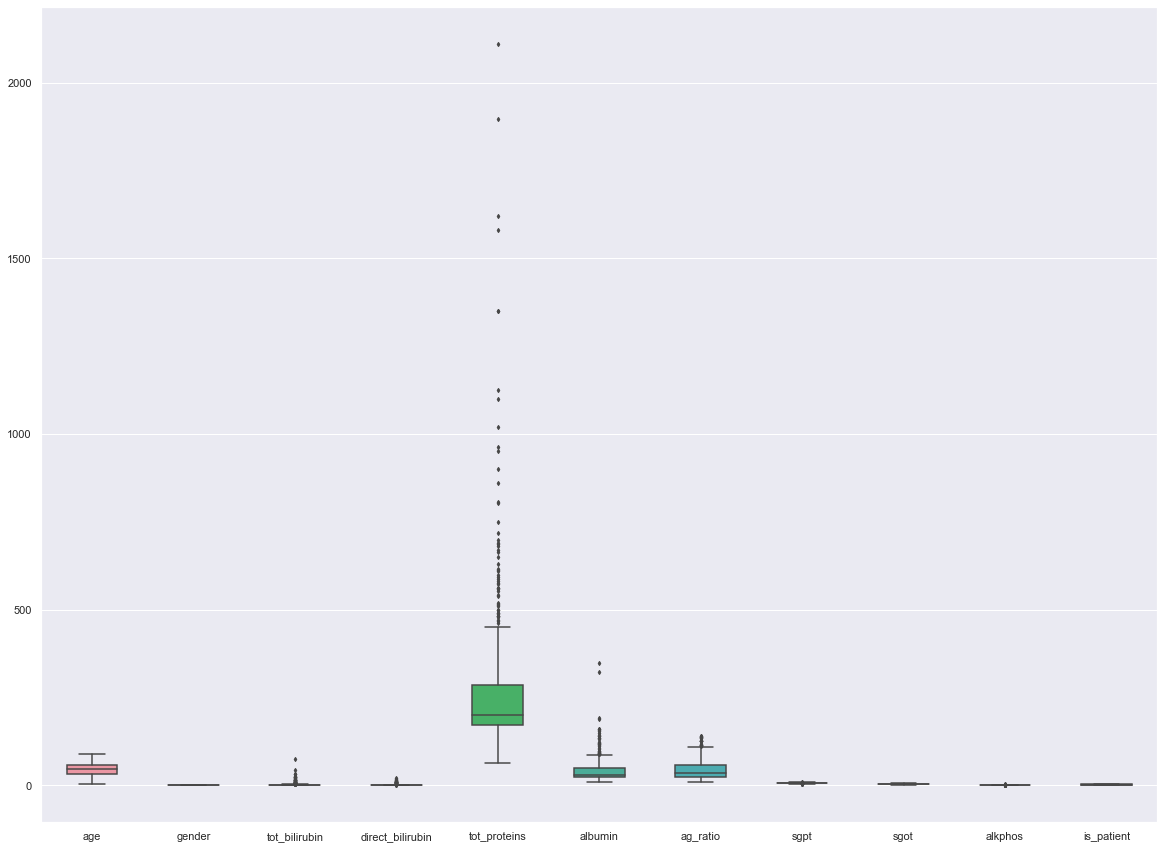

In [16]:
fig,ax = plt.subplots(figsize = (20,15))
sns.boxplot(data = data_cleaned, width = 0.5, ax = ax, fliersize = 3)

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

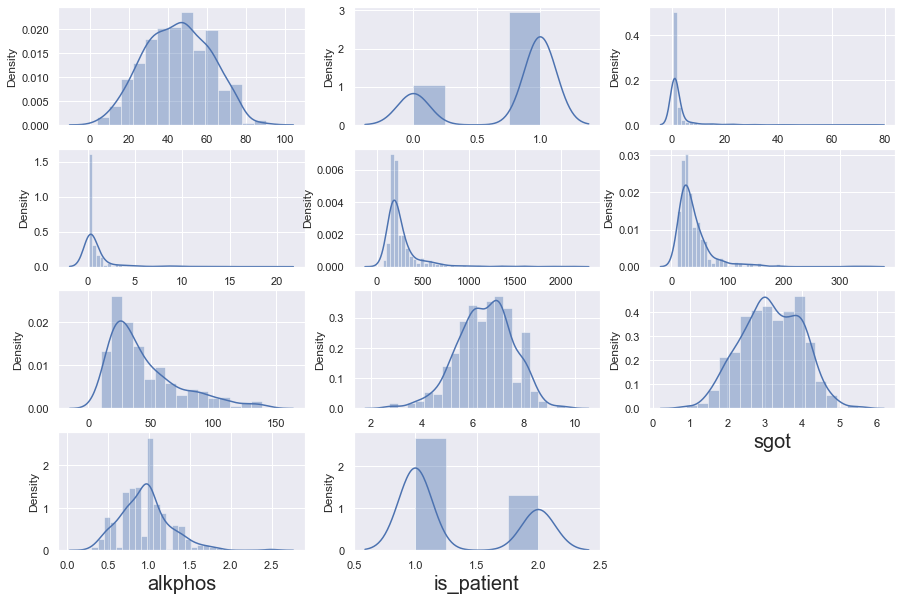

In [17]:
plt.figure(figsize = (15,10), facecolor = 'white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='age', ylabel='tot_proteins'>

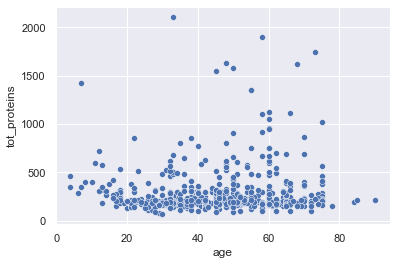

In [18]:
sns.scatterplot(data = data, x = 'age', y = 'tot_proteins' )

In [19]:
corr = data.corr()
corr

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
tot_bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
direct_bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
tot_proteins,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
albumin,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
ag_ratio,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
sgpt,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
sgot,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
alkphos,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


<AxesSubplot:>

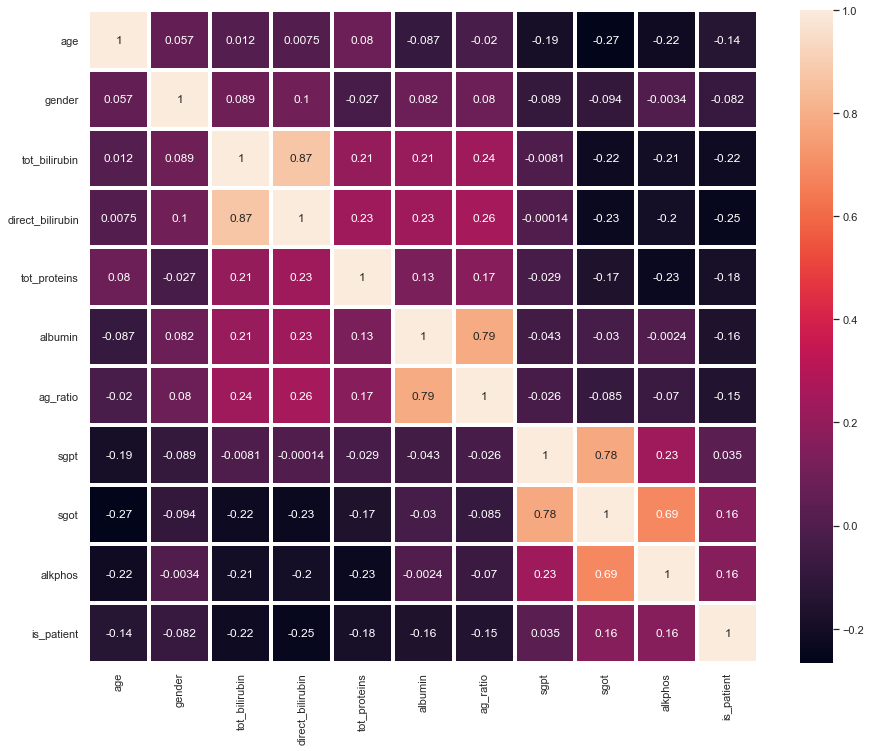

In [20]:
plt.figure(figsize = (15, 12))
sns.heatmap(corr, annot= True, xticklabels = 'auto', yticklabels = 'auto', linewidth= 3)

In [22]:
#Now Just separate the independent and dependent variable in to X and y
X = data.drop(columns = ['is_patient'], axis= 1)
y = data['is_patient']

In [24]:
# Scaling the data
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 1.25209764, -1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704,  0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704,  0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504,  0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917,  0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777,  0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.73759779]])

In [25]:
#checking the Multicolinearity by vif
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.099334,age
1,1.033769,gender
2,4.277117,tot_bilirubin
3,4.525422,direct_bilirubin
4,1.121784,tot_proteins
5,2.820485,albumin
6,2.810982,ag_ratio
7,5.555550,sgpt
8,10.140003,sgot
9,3.689189,alkphos


In [31]:
#drop the highly colineartity features
X = data.drop(['tot_bilirubin', 'direct_bilirubin','sgot', 'sgpt', 'ag_ratio'], axis = 1)

In [32]:
#chcking correlation in X
corr = X.corr()
corr

,age,gender,tot_proteins,albumin,alkphos,is_patient
age,1.000000,0.056560,0.080425,-0.086883,-0.216089,-0.137351
gender,0.056560,1.000000,-0.027496,0.082332,-0.003404,-0.082416
tot_proteins,0.080425,-0.027496,1.000000,0.125680,-0.233960,-0.184866
albumin,-0.086883,0.082332,0.125680,1.000000,-0.002374,-0.163416
alkphos,-0.216089,-0.003404,-0.233960,-0.002374,1.000000,0.162319
is_patient,-0.137351,-0.082416,-0.184866,-0.163416,0.162319,1.000000


<AxesSubplot:>

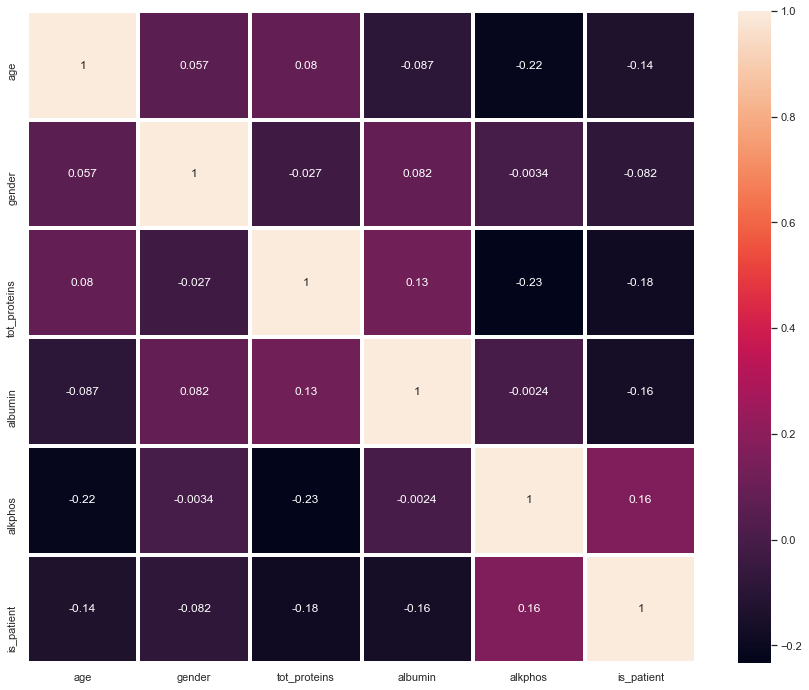

In [33]:
#Checking the correalation in Heatmap
plt.figure(figsize = (15, 12))
sns.heatmap(corr, annot= True, xticklabels = 'auto', yticklabels = 'auto', linewidth= 3)

In [34]:
scaler = StandardScaler()

x_new_scaled = scaler.fit_transform(X)
x_new_scaled

array([[ 1.25209764, -1.76228085, -0.42671496, -0.35466541, -0.14789798,
        -0.63359475],
       [ 1.06663704,  0.56744644,  1.68262856, -0.09159933, -0.65069686,
        -0.63359475],
       [ 1.06663704,  0.56744644,  0.82158795, -0.11352151, -0.17932291,
        -0.63359475],
       ...,
       [ 0.44843504,  0.56744644, -0.18776589, -0.17928803,  0.16635131,
        -0.63359475],
       [-0.84978917,  0.56744644, -0.43907439, -0.28341834,  0.16635131,
        -0.63359475],
       [-0.41704777,  0.56744644, -0.30724042, -0.32726269,  1.73759779,
         1.57829591]])

In [36]:
x_new_scaled

array([[ 1.25209764, -1.76228085, -0.42671496, -0.35466541, -0.14789798,
        -0.63359475],
       [ 1.06663704,  0.56744644,  1.68262856, -0.09159933, -0.65069686,
        -0.63359475],
       [ 1.06663704,  0.56744644,  0.82158795, -0.11352151, -0.17932291,
        -0.63359475],
       ...,
       [ 0.44843504,  0.56744644, -0.18776589, -0.17928803,  0.16635131,
        -0.63359475],
       [-0.84978917,  0.56744644, -0.43907439, -0.28341834,  0.16635131,
        -0.63359475],
       [-0.41704777,  0.56744644, -0.30724042, -0.32726269,  1.73759779,
         1.57829591]])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_new_scaled, y, test_size = 0.30, random_state = 255)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score

In [42]:
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [47]:
log_reg.score(x_test, y_test)

1.0

In [44]:
y_pred = log_reg.predict(x_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

In [49]:
score = f1_score(y_test, y_pred)
score

1.0

In [50]:
from sklearn.svm import SVC

In [51]:
clf = SVC()

clf.fit(x_train, y_train)

SVC()

In [52]:
clf.score(x_test, y_test)

1.0

In [54]:
from sklearn.tree import DecisionTreeClassifier 

In [56]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
dt_clf.score(x_test, y_test)

1.0

In [58]:
from sklearn.ensemble import BaggingClassifier

In [59]:
bag_clf = BaggingClassifier()

bag_clf.fit(x_train, y_train)

BaggingClassifier()

In [60]:
bag_clf.score(x_test, y_test)

1.0

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rand_clf = RandomForestClassifier()

rand_clf.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
rand_clf.score(x_test, y_test)

1.0

In [65]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.simplefilter("ignore")

In [66]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

[23:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb.score(x_test, y_test)

1.0

In [68]:
param_grid = {'C': [0.1,1,10,500,1000,5000], 'gamma': [1.0,0.5,0.1,0.01,0.001]}

In [73]:
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5, n_jobs = -1)

In [74]:
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 500, 1000, 5000],
                         'gamma': [1.0, 0.5, 0.1, 0.01, 0.001]})

In [75]:
grid_search.score(x_test, y_test)

1.0